#### Desc - Building a simple neural network.

In [13]:
# Importing required libraries.

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### Preparing Data!

In [14]:
# Generating synthetic data.

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

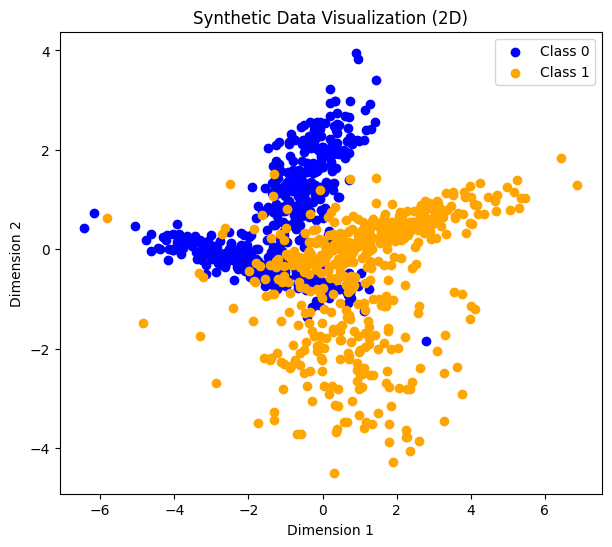

In [15]:
# Visualizing the synthetic data.

# Reducing the features to 2 dimensions for easy visualization.
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plotting a scatter plot.
plt.figure(figsize=(7, 6))
plt.scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], color="blue", label="Class 0")
plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], color="orange", label="Class 1")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Synthetic Data Visualization (2D)")
plt.legend()
plt.show()

In [16]:
# Splitting into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Standardizing the features to improve stability.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Converting into PyTorch tensors so can be used effectively in further model building. 

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

#### Model Building!

In [19]:
# Defining the class.

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10, 50)
        self.layer2 = nn.Linear(50, 2)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        return self.layer2(x)

In [20]:
# Creating an instance of the model.

model = SimpleNN()
print(f"Model structure: {model}\n\n")


Model structure: SimpleNN(
  (layer1): Linear(in_features=10, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=2, bias=True)
)




#### Loss and Optimizer!

In [21]:
#Loss and Optimizer.

loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

#### Training the model!

In [22]:
# Training.

for epoch in range(1, 101):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == 100:  
        print(f"Epoch [{epoch}/100], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.3884
Epoch [20/100], Loss: 0.3160
Epoch [30/100], Loss: 0.2920
Epoch [40/100], Loss: 0.2732
Epoch [50/100], Loss: 0.2616
Epoch [60/100], Loss: 0.2498
Epoch [70/100], Loss: 0.2384
Epoch [80/100], Loss: 0.2275
Epoch [90/100], Loss: 0.2164
Epoch [100/100], Loss: 0.2045


#### Evaluating the model!

In [23]:
# Evaluating.

with torch.no_grad():
    outputs = model(X_test)
    i, predictions = torch.max(outputs, 1)
    accuracy = (predictions == y_test).float().mean()

In [24]:
# Testing.

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84
